# Restaurants San Antonio

In [4]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import metrics

# File to Load
file_path = Path("Restaurants_SanAntonio.csv")

# Read Restaurant Data File and store into Pandas DataFrame
restaurants_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
restaurants_df.head()


,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
0,34517,6,Fiesta Liquor #3,3.0,NaN,"African, Ethiopian, Vegetarian, Alcohol, Liquo...",$,29.574320,-98.515210,14415 Blanco Road,San Antonio,TX,78248.0
1,34518,5,Squeezers Juice Bar,5.0,11.0,"Black-owned, Juice and Smoothies, African, Hea...",NaN,29.441000,-98.485470,914 East Elmira Street,San Antonio,TX,78212.0
2,34520,76,Spinster Sisters Co. (427 Lombrano St),NaN,NaN,"Home &amp; Personal Care, Everyday Essentials,...",$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0
3,34521,194,Yaya's Thai Fusion,NaN,NaN,"Thai, Asian, Noodles",$,29.480652,-98.607908,5819 Northwest Loop 410,San Antonio,TX,78238.0
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0


In [5]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1215 non-null   int64  
 1   position     1215 non-null   int64  
 2   name         1215 non-null   object 
 3   score        672 non-null    float64
 4   ratings      671 non-null    float64
 5   category     1214 non-null   object 
 6   price_range  955 non-null    object 
 7   lat          1215 non-null   float64
 8   lng          1215 non-null   float64
 9   address      1215 non-null   object 
 10  city         1215 non-null   object 
 11  state        1215 non-null   object 
 12  zip_code     1214 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 123.5+ KB


In [6]:
# Check which columns have NaN values and how many NaN values are present in each column
nan_counts = restaurants_df.isnull().sum()

# Display the count of NaN values in each column
print(nan_counts)

id               0
position         0
name             0
score          543
ratings        544
category         1
price_range    260
lat              0
lng              0
address          0
city             0
state            0
zip_code         1
dtype: int64


In [7]:
# Removing rows with NaN values and storing the result in a new DataFrame
restaurants_df_cleaned = restaurants_df.dropna()

# Display the first few rows of the cleaned DataFrame
restaurants_df_cleaned.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0


In [8]:
restaurants_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 4 to 1214
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           558 non-null    int64  
 1   position     558 non-null    int64  
 2   name         558 non-null    object 
 3   score        558 non-null    float64
 4   ratings      558 non-null    float64
 5   category     558 non-null    object 
 6   price_range  558 non-null    object 
 7   lat          558 non-null    float64
 8   lng          558 non-null    float64
 9   address      558 non-null    object 
 10  city         558 non-null    object 
 11  state        558 non-null    object 
 12  zip_code     558 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 61.0+ KB


In [9]:
#Saving the file
restaurants_df_cleaned.to_csv("Output/restaurants_df.csv", index=False, header=True)

## Data Preparation

In [10]:
#Make a copy of the DF to edit for Linear Regression
clean_copy = restaurants_df_cleaned.copy()
clean_copy.head()

,id,position,name,score,ratings,category,price_range,lat,lng,address,city,state,zip_code
4,34522,192,Willie's Grill &amp; Icehouse (7911 Interstate),4.5,92.0,"American, Burgers, Family Friendly, Wings, Alc...",$,29.350066,-98.537672,7911 Interstate 35 Access Rd,San Antonio,TX,78224.0
8,34527,190,McDonald's¬Æ (1643 Pleasanton Road),4.2,167.0,"American, Fast Food, Burgers",$,29.366126,-98.504588,1643 Pleasanton Rd,San Antonio,TX,78221.0
25,34547,215,The Philly Cheesesteak Company (1011 N Loop 16...,3.9,41.0,"American, Sandwiches, Desserts",$,29.611140,-98.477810,1011 N Loop 1604 E,San Antonio,TX,78232.0
28,34551,171,Zito's Delicatessen &amp; Sandwich Shop (8800 ...,4.8,11.0,"Sandwiches, American, Healthy",$$,29.520260,-98.460730,8800 Broadway St,San Antonio,TX,78217.0
29,34552,160,"Nachos Muchachos (427 Lombrano St,)",3.2,33.0,"American, Mexican, Snacks",$$,29.441910,-98.510550,427 Lombrano St,San Antonio,TX,78207.0


In [11]:
# position (Restaurant position in the search result)--keep
# score (Restaurant score)--going to drop this to predict it
# category (Restaurant category)--Maybe keep?? may mean we sacrifice clustering later on
# price_range (Restaurant price range - $ = Inexpensive, $$ = Moderately expensive, $$$ = Expensive, $$$$ = Very Expensive) - Source - stackoverflow
# zip_code (Zip code)--keep!

#drop uneccessary columns
clean_copy.drop(columns=['id','name', 'ratings','lat', 'lng', 'address', 'city', 'state'], inplace=True)
print(clean_copy)

      position  score                                           category  \
4          192    4.5  American, Burgers, Family Friendly, Wings, Alc...   
8          190    4.2                       American, Fast Food, Burgers   
25         215    3.9                     American, Sandwiches, Desserts   
28         171    4.8                      Sandwiches, American, Healthy   
29         160    3.2                          American, Mexican, Snacks   
...        ...    ...                                                ...   
1207       100    4.2                                          Fast Food   
1208        92    4.8                       American, Burgers, Fast Food   
1209        88    4.6  Mexican, Tex Mex, Breakfast and Brunch, Family...   
1211        33    4.7                      Burgers, American, Sandwiches   
1214       185    4.5  Fast Food, American, Family Meals, Family Frie...   

     price_range  zip_code  
4              $   78224.0  
8              $   78221.0  


In [12]:
#look at the category column to see if there are consistent values
clean_copy['category'].value_counts()

Mexican, Latin American, New Mexican                             22
Burgers, American, Sandwiches                                    17
Mexican, Tex Mex, Breakfast and Brunch, Family Meals              7
American, Burgers, Fast Food                                      6
Breakfast and Brunch, American, Sandwiches                        5
                                                                 ..
American, Diner                                                   1
Burgers, American, Sandwiches, Seafood, Bar Food, Cafe, Wings     1
Mexican, American                                                 1
American, Burgers, Comfort Food, Pasta, Sandwich                  1
Sandwich, Deli                                                    1
Name: category, Length: 390, dtype: int64

In [13]:
#categories are overlapping, drop the category column
clean_copy.drop(columns=['category'], inplace  =True)

In [14]:
#check dtypes
clean_copy.dtypes

position         int64
score          float64
price_range     object
zip_code       float64
dtype: object

In [15]:
#Convert the 'price_range' column from $ to number values
clean_copy['price_range'] = clean_copy['price_range'].replace('$', '2')
clean_copy['price_range'] = clean_copy['price_range'].replace('$$', '3')
clean_copy['price_range'] = clean_copy['price_range'].replace('$$$', '4')
clean_copy['price_range'] = clean_copy['price_range'].replace('$$$$', '5')

#convert price_range to int
clean_copy['price_range']=clean_copy['price_range'].astype(int)
clean_copy

,position,score,price_range,zip_code
4,192,4.5,2,78224.0
8,190,4.2,2,78221.0
25,215,3.9,2,78232.0
28,171,4.8,3,78217.0
29,160,3.2,3,78207.0
...,...,...,...,...
1207,100,4.2,2,78204.0
1208,92,4.8,2,78232.0
1209,88,4.6,2,78223.0
1211,33,4.7,2,78232.0


In [16]:
clean_copy.dtypes

position         int64
score          float64
price_range      int32
zip_code       float64
dtype: object

In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(clean_copy)
dummies.head()

,position,score,price_range,zip_code
4,192,4.5,2,78224.0
8,190,4.2,2,78221.0
25,215,3.9,2,78232.0
28,171,4.8,3,78217.0
29,160,3.2,3,78207.0


In [18]:
# #use LabelEncoder to create categorical variables for training and testing
# T = LabelEncoder()                 
# clean_copy['position'] = T.fit_transform(clean_copy['position'])
# clean_copy['price_range'] = T.fit_transform(clean_copy['price_range'])
# clean_copy['zip_code'] = T.fit_transform(clean_copy['zip_code'])
# clean_copy['score'] = T.fit_transform(clean_copy['score'])
# clean_copy.head()

In [19]:
dummies.columns

Index(['position', 'score', 'price_range', 'zip_code'], dtype='object')

In [20]:
# Split our preprocessed data into our features and target arrays
X = dummies.drop('score', axis=1).values
y = dummies['score'].values

In [21]:
# #select the 'position','price_range', 'zip_code' and set y=score
# X= clean_copy.drop(columns=['score'])
# y = clean_copy['score']

In [22]:
# Reformat data of the independent variable X as a single-column array
X.shape

(558, 3)

In [23]:
# Reformat data of the independent variable y as a single-column array
y.shape

(558,)

In [24]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
#Check DF info to see what types to call in scaler
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 4 to 1214
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     558 non-null    int64  
 1   score        558 non-null    float64
 2   price_range  558 non-null    int32  
 3   zip_code     558 non-null    float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 19.6 KB


In [26]:
# #taking numeric values
# from sklearn.preprocessing import StandardScaler
# num_values1=clean_copy.select_dtypes(['float64', 'int64']).columns
# scaler = StandardScaler()
# scaler.fit(clean_copy[num_values1])
# clean_copy[num_values1]=scaler.transform(clean_copy[num_values1])

In [27]:
#taking numeric values
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
#scratch work
dummies.head()

,position,score,price_range,zip_code
4,192,4.5,2,78224.0
8,190,4.2,2,78221.0
25,215,3.9,2,78232.0
28,171,4.8,3,78217.0
29,160,3.2,3,78207.0


## Building the Linear Regression Model

In [29]:
# # Fit to the training data and validate with the test data
# from sklearn.svm import SVC
# model = SVC(kernel='linear')
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)
# predictions

In [30]:
# Create a model with scikit-learn
model = LinearRegression()

# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [31]:
# Display the slope
print(f"Model's slope: {model.coef_}")

# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's slope: [-3.10426143e-04 -4.55623938e-02 -1.61848422e-05]
Model's y-intercept: 5.922171298367785
Model's formula: y = 5.922171298367785 + -0.0003104261429346426X


In [32]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [33]:
# Add a column with the predicted scores
clean_copy["score_predicted"] = predicted_y_values

# Display sample data
clean_copy.head()

,position,score,price_range,zip_code,score_predicted
4,192,4.5,2,78224.0,4.505402
8,190,4.2,2,78221.0,4.506071
25,215,3.9,2,78232.0,4.498132
28,171,4.8,3,78217.0,4.466471
29,160,3.2,3,78207.0,4.470048


In [34]:
#Create separate line plots for each x-axis column and store them in a list
best_fit_line = clean_copy.hvplot.scatter(
    x='position', y='score_predicted', color='red', xlabel="Position",
    ylabel="Predicted Score", title="Predicted Scores Line Plot"
) + clean_copy.hvplot.scatter(
    x='price_range', y='score_predicted', color='blue', xlabel="Price Range"
) + clean_copy.hvplot.scatter(
    x='zip_code', y='score_predicted', color='green', xlabel="Zip Code"
)
best_fit_line

:Layout
   .Scatter.I   :Scatter   [position]   (score_predicted)
   .Scatter.II  :Scatter   [price_range]   (score_predicted)
   .Scatter.III :Scatter   [zip_code]   (score_predicted)

## Linear Regression Model Assessment

In [36]:
# Compute the metrics for the linear regression model
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.007428522305704899.
The r2 is 0.007428522305704899.
The mean squared error is 0.10120174806717845.
The root mean squared error is 0.31812222190092043.
The standard deviation is 0.3193104350257232.


In [37]:
#Run rfr to refine the prediction model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)

# Fit the model with the training data
rfr.fit(X_train,y_train)

# Now the model is trained and can be used for predictions
y_pred_rfr = rfr.predict(X_test)

In [38]:
#Multiply by 100 to set the decimal point
r_score = rfr.score(X_test,y_test)*100

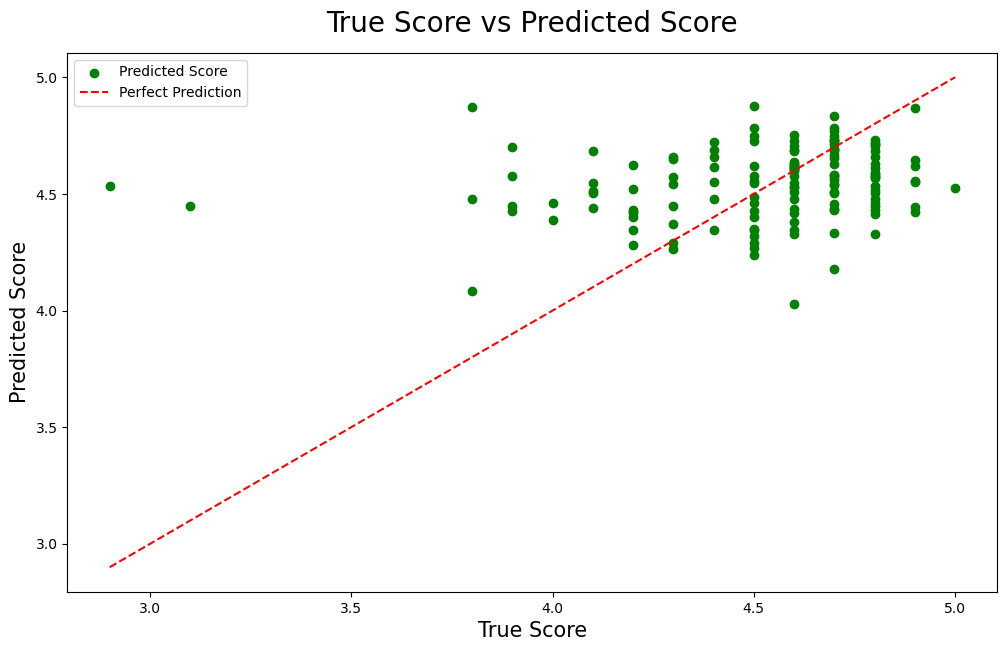

In [42]:
# Create the scatter plot for True score (y_test) versus Predicted score (preds_rf)
# Assuming you've already defined y_test, X_test, and preds_rf

plt.figure(figsize=(12, 7))
plt.scatter(y_test, preds_rf, color="green", label='Predicted Score')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title("True Score vs Predicted Score", size=20, pad=15)
plt.xlabel('True Score', size=15)
plt.ylabel('Predicted Score', size=15)
plt.legend()
plt.show()

In [40]:
# target values y_test and predicted target values y_pred_rfr
r_squared = r2_score(y_test, y_pred_rfr)

print(f"R-squared: {r_squared:.2f}")

accuracy_percentage = r2_score(y_test, y_pred_rfr) * 100
print(f"Accuracy: {accuracy_percentage:.2f}%")


R-squared: -0.04
Accuracy: -4.37%


This scatter plot lets us know that if we had decided to keep the null values in our dataset, we could have predicted a restaurant's score with __% accuracy. ---NOT ACCURATE -3.7%